# Pesticide Use Analysis in Southern Africa (1990-2023)

## Table of Contents
1. Data Loading and Initial Exploration
2. Data Cleaning & Preparation
3. Data Quality Assessment
4. Data Transformation & Merging
5. Exploratory Data Analysis (EDA) & Statistical Analysis
6. Exporting Results (Excel, CSV)
7. Data Visualization
8. Database Integration (SQLite)

This notebook analyzes pesticide use patterns across Southern African countries over a 33-year period (1990-2023). The analysis focuses on South Africa and its surrounding countries, examining both pesticide use intensity (kg/ha) and total consumption (tonnes).

**Objectives:**
1. Clean and prepare the data for analysis
2. Identify trends and patterns in pesticide use
3. Compare countries within the region
4. Analyze different types of pesticides
5. Create visualizations to tell the story of agricultural intensification

## 1. Data Loading and Initial Exploration

In [1]:
# Import necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import xlsxwriter
import plotly.express as px
import plotly.graph_objects as go
from plotly.subplots import make_subplots
import sqlite3
import warnings
warnings.filterwarnings('ignore')

# Display options for better viewing of dataframes
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', 100)
pd.set_option('display.width', None)

# Load datasets
pesticide_per_crop = pd.read_csv('Pesticide_use_per_crop_area.csv',
 usecols=['REF_AREA_LABEL','INDICATOR_LABEL','UNIT_MEASURE_LABEL',
 '1990','1991','1992','1993','1994','1995','1996','1997','1998',
 '1999','2000','2001','2002','2003','2004','2005','2006','2007',
 '2008','2009','2010','2011','2012','2013','2014','2015','2016',
 '2017','2018','2019','2020','2021','2022','2023'] )

pesticide_use = pd.read_csv('Pesticide_use.csv',
 usecols=['REF_AREA_LABEL','INDICATOR_LABEL','UNIT_MEASURE_LABEL',
 'ITEM_LABEL','1990','1991','1992','1993','1994','1995','1996',
 '1997','1998','1999','2000','2001','2002','2003','2004','2005',
 '2006','2007','2008','2009','2010','2011','2012','2013','2014',
 '2015','2016','2017','2018','2019','2020','2021','2022','2023'])

print("Files have been loaded successfully!")
print("\n" + "="*50)
print("PESTICIDE USE PER CROP LAND AREA")
print("="*50)
print(f"Shape: {pesticide_per_crop.shape}")
print(f"Columns: {list(pesticide_per_crop.columns)}")
print("\nFirst 5 rows:")
display(pesticide_per_crop.head())

print("\n" + "="*50)
print("PESTICIDE USE")
print("="*50)
print(f"Shape: {pesticide_use.shape}")
print(f"Columns: {list(pesticide_use.columns)}")
print("\nFirst 5 rows:")
display(pesticide_use.head())

Files have been loaded successfully!

PESTICIDE USE PER CROP LAND AREA
Shape: (199, 37)
Columns: ['REF_AREA_LABEL', 'INDICATOR_LABEL', 'UNIT_MEASURE_LABEL', '1990', '1991', '1992', '1993', '1994', '1995', '1996', '1997', '1998', '1999', '2000', '2001', '2002', '2003', '2004', '2005', '2006', '2007', '2008', '2009', '2010', '2011', '2012', '2013', '2014', '2015', '2016', '2017', '2018', '2019', '2020', '2021', '2022', '2023']

First 5 rows:


,REF_AREA_LABEL,INDICATOR_LABEL,UNIT_MEASURE_LABEL,1990,1991,1992,1993,1994,1995,1996,1997,1998,1999,2000,2001,2002,2003,2004,2005,2006,2007,2008,2009,2010,2011,2012,2013,2014,2015,2016,2017,2018,2019,2020,2021,2022,2023
0,Angola,Pesticides Use per area of cropland,Kilogram per hectare,0.02,0.03,0.01,0.05,0.03,0.11,0.01,0.01,0.01,0.01,0.01,0.01,0.01,0.01,0.01,0.01,0.01,0.01,0.01,0.01,0.01,0.01,0.01,0.01,0.01,0.01,0.01,0.01,0.01,0.01,0.01,0.01,0.01,0.01
1,Albania,Pesticides Use per area of cropland,Kilogram per hectare,0.17,0.17,0.17,0.17,0.29,0.36,0.37,0.39,0.41,0.42,0.44,0.46,0.47,0.49,0.51,0.55,0.53,0.56,0.57,0.59,0.85,0.84,0.52,0.65,0.66,0.77,0.83,0.88,0.64,1.07,0.58,0.63,0.43,0.44
2,Andorra,Pesticides Use per area of cropland,Kilogram per hectare,14.12,14.12,14.12,14.12,14.12,12.82,12.33,14.17,15.40,15.12,18.55,24.00,21.68,13.66,14.55,15.50,18.69,19.50,19.65,17.39,16.52,17.45,18.01,21.31,19.28,20.10,16.33,16.99,16.25,17.97,20.92,22.88,22.27,21.55
3,Netherlands Antilles,Pesticides Use per area of cropland,Kilogram per hectare,23.13,23.85,24.75,25.85,26.42,26.99,27.55,28.12,28.69,29.26,29.83,30.39,30.96,32.11,33.85,33.36,31.11,28.97,28.87,29.75,29.75,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,Argentina,Pesticides Use per area of cropland,Kilogram per hectare,0.95,0.94,0.94,0.94,1.08,1.35,1.93,2.74,2.19,2.57,2.94,3.31,3.67,3.79,3.90,3.99,4.09,4.92,5.55,3.95,6.04,5.57,5.32,5.25,5.20,4.93,4.87,4.74,4.19,5.76,5.62,6.06,5.94,6.33



PESTICIDE USE
Shape: (839, 38)
Columns: ['REF_AREA_LABEL', 'INDICATOR_LABEL', 'UNIT_MEASURE_LABEL', 'ITEM_LABEL', '1990', '1991', '1992', '1993', '1994', '1995', '1996', '1997', '1998', '1999', '2000', '2001', '2002', '2003', '2004', '2005', '2006', '2007', '2008', '2009', '2010', '2011', '2012', '2013', '2014', '2015', '2016', '2017', '2018', '2019', '2020', '2021', '2022', '2023']

First 5 rows:


,REF_AREA_LABEL,INDICATOR_LABEL,UNIT_MEASURE_LABEL,ITEM_LABEL,1990,1991,1992,1993,1994,1995,1996,1997,1998,1999,2000,2001,2002,2003,2004,2005,2006,2007,2008,2009,2010,2011,2012,2013,2014,2015,2016,2017,2018,2019,2020,2021,2022,2023
0,Aruba,Pesticides Agricultural Use,Tonnes,Item: Insecticides,34.0,36.0,39.0,44.0,49.0,54.0,58.0,60.0,61.0,62.0,63.0,65.0,67.0,70.0,73.0,75.0,77.0,78.0,80.0,81.0,82.0,76.0,69.0,62.0,59.0,67.0,66.0,65.0,53.0,55.0,62.0,66.0,64.0,60.0
1,Aruba,Pesticides Agricultural Use,Tonnes,Item: Herbicides,74.0,78.0,84.0,95.0,105.0,116.0,127.0,138.0,148.0,160.0,175.0,190.0,206.0,219.0,233.0,248.0,267.0,287.0,306.0,325.0,339.0,322.0,298.0,267.0,253.0,293.0,294.0,299.0,248.0,258.0,292.0,314.0,307.0,287.0
2,Aruba,Pesticides Agricultural Use,Tonnes,Item: Fungicides and Bactericides,18.0,19.0,21.0,24.0,26.0,28.0,31.0,35.0,39.0,41.0,43.0,43.0,45.0,47.0,51.0,55.0,57.0,60.0,64.0,70.0,74.0,69.0,62.0,55.0,53.0,63.0,66.0,69.0,59.0,63.0,73.0,79.0,77.0,72.0
3,Aruba,Pesticides Agricultural Use,Tonnes,Item: Pesticides (total),148.0,155.0,169.0,190.0,211.0,232.0,253.0,274.0,294.0,315.0,336.0,357.0,378.0,399.0,420.0,441.0,461.0,482.0,503.0,525.0,538.0,502.0,459.0,410.0,391.0,454.0,459.0,467.0,388.0,404.0,458.0,491.0,480.0,449.0
4,Angola,Pesticides Agricultural Use,Tonnes,Item: Insecticides,56.0,74.0,13.0,153.0,22.0,205.0,37.0,37.0,37.0,37.0,37.0,37.0,37.0,37.0,37.0,37.0,37.0,37.0,37.0,37.0,37.0,37.0,37.0,37.0,37.0,37.0,37.0,37.0,37.0,37.0,37.0,37.0,37.0,37.0


## 2. Data Cleaning and Preparation

In [2]:
# Standardize and rename columns
pesticide_use["ITEM_LABEL"] = pesticide_use["ITEM_LABEL"].replace({
    "Item: Insecticides": "Insecticides",
    "Item: Fungicides and Bactericides": "Fungicides and Bactericides",
    "Item: Herbicides": "Herbicides",
    "Item: Pesticides (total)": "Pesticides (total)"
})
pesticide_use = pesticide_use.rename(
    columns={
        "REF_AREA_LABEL": "Country",
        "INDICATOR_LABEL": "Indicator",
        "UNIT_MEASURE_LABEL": "Unit_Measure(T)",
        "ITEM_LABEL": "Pesticide_Type"
    }
)
pesticide_per_crop = pesticide_per_crop.rename(
    columns={
        "REF_AREA_LABEL": "Country",
        "INDICATOR_LABEL": "Indicator",
        "UNIT_MEASURE_LABEL": "Unit_Measure(kg/ha)",
    }
)

# Define South Africa and its surrounding countries
target_countries = [
    'South Africa', 'Namibia', 'Botswana', 'Zimbabwe', 'Mozambique',
    'Eswatini', 'Lesotho', 'Zambia', 'Angola', 'Malawi'
]

# Check which target countries are in each dataset
print("\n" + "="*50)
print("Target countries found in datasets:")
for country in target_countries:
    in_per_crop = country in pesticide_per_crop['Country'].values
    in_use = country in pesticide_use['Country'].values
    print(f"{country:20} - Per Crop: {in_per_crop}, Use: {in_use}")

# Filter both datasets for target countries (including alternative names)
alternative_names = {
    'Eswatini': ['Swaziland', 'Eswatini'],
    'South Africa': ['South Africa']
}
all_country_names = []
for country in target_countries:
    if country in alternative_names:
        all_country_names.extend(alternative_names[country])
    else:
        all_country_names.append(country)

pesticide_per_crop_filtered = pesticide_per_crop[
    pesticide_per_crop['Country'].isin(all_country_names)
].copy()
pesticide_use_filtered = pesticide_use[
    pesticide_use['Country'].isin(all_country_names)
].copy()

print(f"Filtered Pesticide Per Crop: {pesticide_per_crop_filtered.shape}")
print(f"Countries included: {pesticide_per_crop_filtered['Country'].unique()}")
print(f"\nFiltered Pesticide Use: {pesticide_use_filtered.shape}")
print(f"Countries included: {pesticide_use_filtered['Country'].unique()}")


Target countries found in datasets:
South Africa         - Per Crop: True, Use: True
Namibia              - Per Crop: True, Use: True
Botswana             - Per Crop: True, Use: True
Zimbabwe             - Per Crop: True, Use: True
Mozambique           - Per Crop: True, Use: True
Eswatini             - Per Crop: True, Use: True
Lesotho              - Per Crop: True, Use: True
Zambia               - Per Crop: True, Use: True
Angola               - Per Crop: True, Use: True
Malawi               - Per Crop: True, Use: True
Filtered Pesticide Per Crop: (10, 37)
Countries included: ['Angola' 'Botswana' 'Lesotho' 'Mozambique' 'Malawi' 'Namibia' 'Eswatini'
 'South Africa' 'Zambia' 'Zimbabwe']

Filtered Pesticide Use: (40, 38)
Countries included: ['Angola' 'Botswana' 'Lesotho' 'Mozambique' 'Malawi' 'Namibia' 'Eswatini'
 'South Africa' 'Zambia' 'Zimbabwe']


## 3. Data Quality Assessment

In [3]:
# Check for missing values, zeros, and value ranges
year_columns = [col for col in pesticide_per_crop_filtered.columns if col.isdigit()]
print(f"Year columns: {year_columns[0]} to {year_columns[-1]}")

print("\n" + "="*50)
print("MISSING VALUES - Pesticide Per Crop (Filtered)")
print("="*50)
missing_per_crop = pesticide_per_crop_filtered[year_columns].isnull().sum()
missing_per_crop_pct = (missing_per_crop / len(pesticide_per_crop_filtered)) * 100
missing_summary_per_crop = pd.DataFrame({
    'Year': year_columns,
    'Missing_Count': missing_per_crop.values,
    'Missing_Percentage': missing_per_crop_pct.values
})
print(missing_summary_per_crop[missing_summary_per_crop['Missing_Count'] > 0])

print("\nMissing values by country:")
for country in pesticide_per_crop_filtered['Country'].unique():
    country_data = pesticide_per_crop_filtered[pesticide_per_crop_filtered['Country'] == country]
    missing_count = country_data[year_columns].isnull().sum().sum()
    total_cells = len(year_columns)
    print(f"{country:20} - Missing: {missing_count}/{total_cells} ({missing_count/total_cells*100:.1f}%)")

# Do the same for pesticide_use_filtered
year_columns_use = [col for col in pesticide_use_filtered.columns if col.isdigit()]
print("="*50)
print("MISSING VALUES - Pesticide Use (Filtered)")
print("="*50)
missing_use = pesticide_use_filtered[year_columns_use].isnull().sum()
missing_use_pct = (missing_use / len(pesticide_use_filtered)) * 100
missing_summary_use = pd.DataFrame({
    'Year': year_columns_use,
    'Missing_Count': missing_use.values,
    'Missing_Percentage': missing_use_pct.values
})
print(missing_summary_use[missing_summary_use['Missing_Count'] > 0])

print("\nMissing values by country and pesticide type:")
for country in pesticide_use_filtered['Country'].unique():
    country_data = pesticide_use_filtered[pesticide_use_filtered['Country'] == country]
    items = country_data['Pesticide_Type'].unique()
    print(f"\n{country}:")
    for item in items:
        item_data = country_data[country_data['Pesticide_Type'] == item]
        missing_count = item_data[year_columns_use].isnull().sum().sum()
        total_cells = len(year_columns_use)
        print(f"  {item:35} - Missing: {missing_count}/{total_cells} ({missing_count/total_cells*100:.1f}%)")

Year columns: 1990 to 2023

MISSING VALUES - Pesticide Per Crop (Filtered)
Empty DataFrame
Columns: [Year, Missing_Count, Missing_Percentage]
Index: []

Missing values by country:
Angola               - Missing: 0/34 (0.0%)
Botswana             - Missing: 0/34 (0.0%)
Lesotho              - Missing: 0/34 (0.0%)
Mozambique           - Missing: 0/34 (0.0%)
Malawi               - Missing: 0/34 (0.0%)
Namibia              - Missing: 0/34 (0.0%)
Eswatini             - Missing: 0/34 (0.0%)
South Africa         - Missing: 0/34 (0.0%)
Zambia               - Missing: 0/34 (0.0%)
Zimbabwe             - Missing: 0/34 (0.0%)
MISSING VALUES - Pesticide Use (Filtered)
Empty DataFrame
Columns: [Year, Missing_Count, Missing_Percentage]
Index: []

Missing values by country and pesticide type:

Angola:
  Insecticides                        - Missing: 0/34 (0.0%)
  Herbicides                          - Missing: 0/34 (0.0%)
  Fungicides and Bactericides         - Missing: 0/34 (0.0%)
  Pesticides (total)  

## Missing Values Verification

In [4]:
# Verify that we have no missing values
print("="*50)
print("VERIFICATION: Missing Values Check")
print("="*50)

# Check for missing values in all columns
print("Pesticide Per Crop Dataset:")
print(f"Total missing values: {pesticide_per_crop_filtered.isnull().sum().sum()}")
print(f"Missing in year columns: {pesticide_per_crop_filtered[year_columns].isnull().sum().sum()}")

print("\nPesticide Use Dataset:")
print(f"Total missing values: {pesticide_use_filtered.isnull().sum().sum()}")
print(f"Missing in year columns: {pesticide_use_filtered[year_columns].isnull().sum().sum()}")

# Check for any anomalies in the data (zeros, negative values, outliers)
print("\n" + "="*50)
print("DATA QUALITY CHECK")
print("="*50)

# Check for zeros
zeros_per_crop = (pesticide_per_crop_filtered[year_columns] == 0).sum().sum()
zeros_use = (pesticide_use_filtered[year_columns] == 0).sum().sum()

print(f"Zero values in Pesticide Per Crop: {zeros_per_crop}")
print(f"Zero values in Pesticide Use: {zeros_use}")

# Check value ranges
print("\nValue ranges for Pesticide Per Crop (kg/ha):")
print(f"Min: {pesticide_per_crop_filtered[year_columns].min().min():.2f}")
print(f"Max: {pesticide_per_crop_filtered[year_columns].max().max():.2f}")

print("\nValue ranges for Pesticide Use (tonnes):")
print(f"Min: {pesticide_use_filtered[year_columns].min().min():.2f}")
print(f"Max: {pesticide_use_filtered[year_columns].max().max():.2f}")

VERIFICATION: Missing Values Check
Pesticide Per Crop Dataset:
Total missing values: 0
Missing in year columns: 0

Pesticide Use Dataset:
Total missing values: 0
Missing in year columns: 0

DATA QUALITY CHECK
Zero values in Pesticide Per Crop: 0
Zero values in Pesticide Use: 48

Value ranges for Pesticide Per Crop (kg/ha):
Min: 0.01
Max: 6.57

Value ranges for Pesticide Use (tonnes):
Min: 0.00
Max: 42620.00


## 4. Data Transformation

In [5]:
# 1. Transform (Melt datasets)
year_cols_use = [col for col in pesticide_use_filtered.columns if col.isdigit()]
year_cols_per_crop = [col for col in pesticide_per_crop_filtered.columns if col.isdigit()]

id_cols_use = [col for col in pesticide_use_filtered.columns if col not in year_cols_use]
id_cols_per_crop = [col for col in pesticide_per_crop_filtered.columns if col not in year_cols_per_crop]

# Melt into long format
pesticide_use_long = pd.melt(
    pesticide_use_filtered,
    id_vars=id_cols_use,
    value_vars=year_cols_use,
    var_name='Year',
    value_name='Tonnes'
)

pesticide_per_crop_long = pd.melt(
    pesticide_per_crop_filtered,
    id_vars=id_cols_per_crop,
    value_vars=year_cols_per_crop,
    var_name='Year',
    value_name='Kg_per_ha'
)

print("Transformation complete.")
display(pesticide_use_long.head())
display(pesticide_per_crop_long.head())


Transformation complete.


,Country,Indicator,Unit_Measure(T),Pesticide_Type,Year,Tonnes
0,Angola,Pesticides Agricultural Use,Tonnes,Insecticides,1990,56.0
1,Angola,Pesticides Agricultural Use,Tonnes,Herbicides,1990,0.0
2,Angola,Pesticides Agricultural Use,Tonnes,Fungicides and Bactericides,1990,5.0
3,Angola,Pesticides Agricultural Use,Tonnes,Pesticides (total),1990,64.0
4,Botswana,Pesticides Agricultural Use,Tonnes,Insecticides,1990,272.0


,Country,Indicator,Unit_Measure(kg/ha),Year,Kg_per_ha
0,Angola,Pesticides Use per area of cropland,Kilogram per hectare,1990,0.02
1,Botswana,Pesticides Use per area of cropland,Kilogram per hectare,1990,0.83
2,Lesotho,Pesticides Use per area of cropland,Kilogram per hectare,1990,0.02
3,Mozambique,Pesticides Use per area of cropland,Kilogram per hectare,1990,0.03
4,Malawi,Pesticides Use per area of cropland,Kilogram per hectare,1990,0.07


## Data Type Standardization

In [6]:
# Standardize Data Types

# Convert Year to int
pesticide_use_long['Year'] = pd.to_numeric(pesticide_use_long['Year'], errors='coerce').astype('Int64')
pesticide_per_crop_long['Year'] = pd.to_numeric(pesticide_per_crop_long['Year'], errors='coerce').astype('Int64')

# Ensure numeric columns are floats
pesticide_use_long['Tonnes'] = pd.to_numeric(pesticide_use_long['Tonnes'], errors='coerce')
pesticide_per_crop_long['Kg_per_ha'] = pd.to_numeric(pesticide_per_crop_long['Kg_per_ha'], errors='coerce')

# Standardize country names (rename Swaziland → Eswatini)
pesticide_use_long['Country'] = pesticide_use_long['Country'].replace('Swaziland', 'Eswatini')
pesticide_per_crop_long['Country'] = pesticide_per_crop_long['Country'].replace('Swaziland', 'Eswatini')

print("Data type standardization complete.")
print("\nPesticide Use dtypes:")
print(pesticide_use_long.dtypes)
print("\nPesticide Per Crop dtypes:")
print(pesticide_per_crop_long.dtypes)


Data type standardization complete.

Pesticide Use dtypes:
Country             object
Indicator           object
Unit_Measure(T)     object
Pesticide_Type      object
Year                 Int64
Tonnes             float64
dtype: object

Pesticide Per Crop dtypes:
Country                 object
Indicator               object
Unit_Measure(kg/ha)     object
Year                     Int64
Kg_per_ha              float64
dtype: object


## Data Merging & Verification

In [ ]:
# Merge Datasets
merged_df = pd.merge(
    pesticide_use_long,
    pesticide_per_crop_long,
    on=['Country', 'Year'],
    how='inner'
)

print(f"Merged dataframe shape: {merged_df.shape}")
display(merged_df.head())

# Filter out "Pesticides (total)" rows
df_no_total = merged_df[merged_df['Pesticide_Type'] != 'Pesticides (total)']

# Compute totals per Country + Year (sum Tonnes)
totals_df = (
    df_no_total.groupby(['Country', 'Year'], as_index=False)
    .agg({'Tonnes': 'sum'})
)

# Compute Kg_per_ha for totals (weighted)
totals_df['Kg_per_ha'] = df_no_total.groupby(['Country', 'Year']).apply(
    lambda x: (x['Kg_per_ha'] * x['Tonnes']).sum() / x['Tonnes'].sum() if x['Tonnes'].sum() > 0 else 0
).values

# Add meta-columns for totals
totals_df['Pesticide_Type'] = 'Pesticides (total)'
totals_df['Indicator_x'] = 'Pesticides Agricultural Use'
totals_df['Unit_Measure(T)'] = 'Tonnes'
totals_df['Indicator_y'] = 'Pesticides Use per area of cropland'
totals_df['Unit_Measure(kg/ha)'] = 'Kilogram per hectare'

# Insert totals under each Country + Year group
merged_df_fixed = pd.DataFrame()  # start empty

for (country, year), group in df_no_total.groupby(['Country', 'Year'], sort=False):
    merged_df_fixed = pd.concat([merged_df_fixed, group, totals_df[(totals_df['Country']==country) & (totals_df['Year']==year)]], ignore_index=True)

print("\nFixed Dataframe with totals under each country/year group:")
display(merged_df_fixed.head(10))


Merged dataframe shape: (1360, 9)


,Country,Indicator_x,Unit_Measure(T),Pesticide_Type,Year,Tonnes,Indicator_y,Unit_Measure(kg/ha),Kg_per_ha
0,Angola,Pesticides Agricultural Use,Tonnes,Insecticides,1990,56.0,Pesticides Use per area of cropland,Kilogram per hectare,0.02
1,Angola,Pesticides Agricultural Use,Tonnes,Herbicides,1990,0.0,Pesticides Use per area of cropland,Kilogram per hectare,0.02
2,Angola,Pesticides Agricultural Use,Tonnes,Fungicides and Bactericides,1990,5.0,Pesticides Use per area of cropland,Kilogram per hectare,0.02
3,Angola,Pesticides Agricultural Use,Tonnes,Pesticides (total),1990,64.0,Pesticides Use per area of cropland,Kilogram per hectare,0.02
4,Botswana,Pesticides Agricultural Use,Tonnes,Insecticides,1990,272.0,Pesticides Use per area of cropland,Kilogram per hectare,0.83



Fixed Dataframe with totals under each country/year group:


,Country,Indicator_x,Unit_Measure(T),Pesticide_Type,Year,Tonnes,Indicator_y,Unit_Measure(kg/ha),Kg_per_ha
0,Angola,Pesticides Agricultural Use,Tonnes,Insecticides,1990,56.0,Pesticides Use per area of cropland,Kilogram per hectare,0.02
1,Angola,Pesticides Agricultural Use,Tonnes,Herbicides,1990,0.0,Pesticides Use per area of cropland,Kilogram per hectare,0.02
2,Angola,Pesticides Agricultural Use,Tonnes,Fungicides and Bactericides,1990,5.0,Pesticides Use per area of cropland,Kilogram per hectare,0.02
3,Angola,Pesticides Agricultural Use,Tonnes,Pesticides (total),1990,61.0,Pesticides Use per area of cropland,Kilogram per hectare,0.02
4,Botswana,Pesticides Agricultural Use,Tonnes,Insecticides,1990,272.0,Pesticides Use per area of cropland,Kilogram per hectare,0.83
5,Botswana,Pesticides Agricultural Use,Tonnes,Herbicides,1990,52.0,Pesticides Use per area of cropland,Kilogram per hectare,0.83
6,Botswana,Pesticides Agricultural Use,Tonnes,Fungicides and Bactericides,1990,20.0,Pesticides Use per area of cropland,Kilogram per hectare,0.83
7,Botswana,Pesticides Agricultural Use,Tonnes,Pesticides (total),1990,344.0,Pesticides Use per area of cropland,Kilogram per hectare,0.83
8,Lesotho,Pesticides Agricultural Use,Tonnes,Insecticides,1990,0.0,Pesticides Use per area of cropland,Kilogram per hectare,0.02
9,Lesotho,Pesticides Agricultural Use,Tonnes,Herbicides,1990,3.0,Pesticides Use per area of cropland,Kilogram per hectare,0.02


## 5. Exploratory Data Analysis & Statistical Analysis

In [9]:
# Numerical Analysis with NumPy
try:
    print("=== Numerical Analysis with NumPy ===")

    # --- Analysis for Tonnes ---
    print("\n--- Tonnes ---")
    tonnes_array = merged_df_fixed['Tonnes'].dropna().to_numpy()
    print(f"Mean pesticide use (Tonnes): {np.mean(tonnes_array):.2f}")
    print(f"Median pesticide use (Tonnes): {np.median(tonnes_array):.2f}")
    print(f"Standard deviation (Tonnes): {np.std(tonnes_array):.2f}")
    print(f"Variance (Tonnes): {np.var(tonnes_array):.2f}\n")

    agg_tonnes = merged_df_fixed.groupby(['Year', 'Country'], as_index=False)['Tonnes'].mean()
    pivoted_tonnes = agg_tonnes.pivot(index='Year', columns='Country', values='Tonnes').fillna(0)
    reshaped_tonnes = pivoted_tonnes.to_numpy()
    print("Reshaped Tonnes array shape:", reshaped_tonnes.shape)
    total_tonnes_per_year = np.sum(reshaped_tonnes, axis=1)
    print("Total pesticide use per year (Tonnes, first 10 values):", total_tonnes_per_year[:10])

    # --- Analysis for Kg_per_ha ---
    print("\n--- Kg_per_ha ---")
    kg_array = merged_df_fixed['Kg_per_ha'].dropna().to_numpy()
    print(f"Mean pesticide use per hectare (Kg/ha): {np.mean(kg_array):.2f}")
    print(f"Median pesticide use per hectare (Kg/ha): {np.median(kg_array):.2f}")
    print(f"Standard deviation (Kg/ha): {np.std(kg_array):.2f}")
    print(f"Variance (Kg/ha): {np.var(kg_array):.2f}\n")

    agg_kg = merged_df_fixed.groupby(['Year', 'Country'], as_index=False)['Kg_per_ha'].mean()
    pivoted_kg = agg_kg.pivot(index='Year', columns='Country', values='Kg_per_ha').fillna(0)
    reshaped_kg = pivoted_kg.to_numpy()
    print("Reshaped Kg_per_ha array shape:", reshaped_kg.shape)
    total_kg_per_year = np.sum(reshaped_kg, axis=1)
    print("Total pesticide use per year (Kg/ha, first 10 values):", total_kg_per_year[:10])

    # --- Summary statistics per country (both metrics) ---
    summary_country = merged_df_fixed.groupby('Country').agg({
        'Kg_per_ha': ['count', 'mean', 'std', 'min', 'max'],
        'Tonnes': ['mean', 'std', 'min', 'max']
    }).round(2)

    #Summary by country and pesticide type
    if 'Pesticide_Type' in merged_df_fixed.columns:
        summary_type = merged_df_fixed.groupby(['Country', 'Pesticide_Type']).agg({
            'Kg_per_ha': ['mean', 'std', 'min', 'max'],
            'Tonnes': ['mean', 'std', 'min', 'max']
        }).round(2)

    print(f"\n📊 Dataset Summary:")
    print(f"  • Countries analyzed: {merged_df_fixed['Country'].nunique()}")
    print(f"  • Years covered: {merged_df_fixed['Year'].min()} - {merged_df['Year'].max()}")
    print(f"  • Total records: {len(merged_df_fixed)}")

except Exception as e:
    print("Error: ", str(e))

=== Numerical Analysis with NumPy ===

--- Tonnes ---
Mean pesticide use (Tonnes): 1780.54
Median pesticide use (Tonnes): 233.50
Standard deviation (Tonnes): 4980.64
Variance (Tonnes): 24806790.55

Reshaped Tonnes array shape: (34, 10)
Total pesticide use per year (Tonnes, first 10 values): [10889.  11086.5  9893.   9716.5  9649.  10712.5 11464.  12699.5 14104.5
 14968.5]

--- Kg_per_ha ---
Mean pesticide use per hectare (Kg/ha): 1.14
Median pesticide use per hectare (Kg/ha): 0.71
Standard deviation (Kg/ha): 1.40
Variance (Kg/ha): 1.95

Reshaped Kg_per_ha array shape: (34, 10)
Total pesticide use per year (Kg/ha, first 10 values): [9.22 9.75 8.91 7.8  7.45 7.68 7.95 8.08 8.61 8.34]

📊 Dataset Summary:
  • Countries analyzed: 10
  • Years covered: 1990 - 2023
  • Total records: 1360


## 6. Saving Cleaned Data

In [10]:
print("="*50)
print("SAVING CLEANED MERGED DATASET")
print("="*50)

# Save merged dataset to CSV
merged_df_fixed.to_csv('Pesticide_Cleaned_Data_v3.csv', index=False)

# Save to Excel with multiple sheets
with pd.ExcelWriter('Pesticide_Cleaned_Data.xlsx', engine='openpyxl') as writer:
    merged_df_fixed.to_excel(writer, sheet_name='Merged_Data', index=False)
    summary_country.to_excel(writer, sheet_name='Summary_Per_Country')
    if 'type_col' in locals():
        summary_type.to_excel(writer, sheet_name='Summary_Per_Type')

print("    Merged files saved successfully:")
print("  • Pesticide_Cleaned_Data_v3.csv")
print("  • Pesticide_Cleaned_Data_v3.xlsx (with multiple sheets)")

SAVING CLEANED MERGED DATASET
    Merged files saved successfully:
  • Pesticide_Cleaned_Data_v3.csv
  • Pesticide_Cleaned_Data_v3.xlsx (with multiple sheets)


## 7. Data Visualization and Analysis

In [11]:
# Load the cleaned data
pesticide_uses = pd.read_csv('pesticide_merged_cleaned.csv')

print("Cleaned datasets loaded successfully!")
print(f"Pesticide Uses: {pesticide_uses.shape}")

# Set style for better-looking plots
plt.style.use('seaborn-v0_8-darkgrid')
sns.set_palette("husl")
plt.rcParams['figure.figsize'] = (12, 6)
plt.rcParams['font.size'] = 10
plt.rcParams['axes.titlesize'] = 14
plt.rcParams['axes.labelsize'] = 12
plt.rcParams['xtick.labelsize'] = 10
plt.rcParams['ytick.labelsize'] = 10
plt.rcParams['legend.fontsize'] = 10

# Define color palette for countries
country_colors = {
    'South Africa': '#1f77b4',
    'Namibia': '#ff7f0e',
    'Botswana': '#2ca02c',
    'Zimbabwe': '#d62728',
    'Mozambique': '#9467bd',
    'Eswatini': '#8c564b',
    'Lesotho': '#e377c2',
    'Zambia': '#7f7f7f',
    'Angola': '#bcbd22',
    'Malawi': '#17becf'
}

print("\nVisualization environment ready!")
print(f"Countries in dataset: {sorted(pesticide_uses['Country'].unique())}")
print(f"Years covered: {pesticide_uses['Year'].min()} - {pesticide_uses['Year'].max()}")


Cleaned datasets loaded successfully!
Pesticide Uses: (1360, 9)

Visualization environment ready!
Countries in dataset: ['Angola', 'Botswana', 'Eswatini', 'Lesotho', 'Malawi', 'Mozambique', 'Namibia', 'South Africa', 'Zambia', 'Zimbabwe']
Years covered: 1990 - 2023


## Pesticide Use Intensity Overview

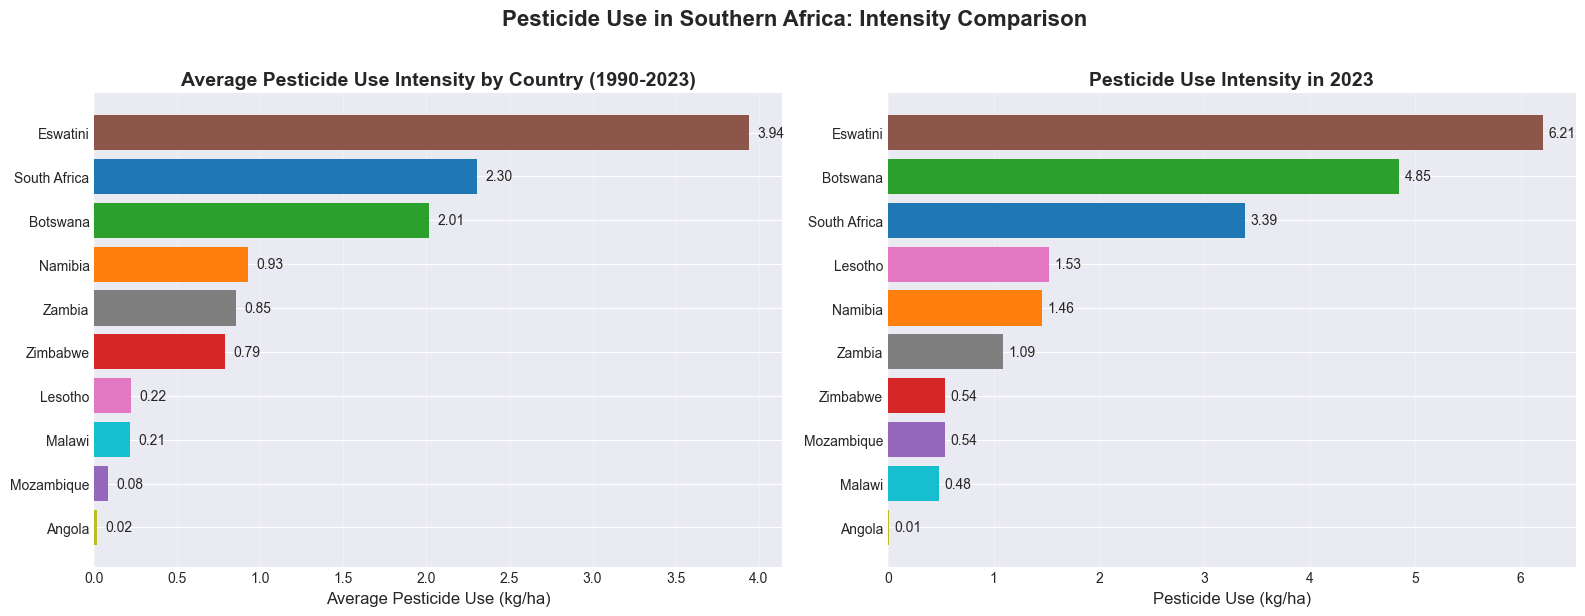


KEY INSIGHTS:
• Highest average use: Eswatini (3.94 kg/ha)
• Lowest average use: Angola (0.02 kg/ha)
• Regional average: 1.14 kg/ha


In [12]:
# Create overview visualization - Average pesticide use per hectare by country
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(16, 6))

# Calculate average pesticide use per hectare for each country
avg_per_country = pesticide_uses.groupby('Country')['Kg_per_ha'].mean().sort_values()

# Bar chart
bars = ax1.barh(avg_per_country.index, avg_per_country.values,
                color=[country_colors.get(c, '#666666') for c in avg_per_country.index])
ax1.set_xlabel('Average Pesticide Use (kg/ha)')
ax1.set_title('Average Pesticide Use Intensity by Country (1990-2023)', fontweight='bold')
ax1.grid(axis='x', alpha=0.3)

# Add value labels
for i, (country, value) in enumerate(avg_per_country.items()):
    ax1.text(value + 0.05, i, f'{value:.2f}', va='center')

# Latest year comparison (2023)
latest_year_data = pesticide_uses[pesticide_uses['Year'] == 2023]
latest_per_country = latest_year_data.groupby('Country')['Kg_per_ha'].mean().sort_values()

bars2 = ax2.barh(latest_per_country.index, latest_per_country.values,
                 color=[country_colors.get(c, '#666666') for c in latest_per_country.index])
ax2.set_xlabel('Pesticide Use (kg/ha)')
ax2.set_title('Pesticide Use Intensity in 2023', fontweight='bold')
ax2.grid(axis='x', alpha=0.3)

# Add value labels
for i, (country, value) in enumerate(latest_per_country.items()):
    ax2.text(value + 0.05, i, f'{value:.2f}', va='center')

plt.suptitle('Pesticide Use in Southern Africa: Intensity Comparison',
             fontsize=16, fontweight='bold', y=1.02)
plt.tight_layout()
plt.show()

# Print insights
print("\nKEY INSIGHTS:")
print(f"• Highest average use: {avg_per_country.idxmax()} ({avg_per_country.max():.2f} kg/ha)")
print(f"• Lowest average use: {avg_per_country.idxmin()} ({avg_per_country.min():.2f} kg/ha)")
print(f"• Regional average: {avg_per_country.mean():.2f} kg/ha")

## Time Series Analysis

In [13]:
# Create interactive time series plot showing trends for all countries
fig = px.line(pesticide_uses,
              x='Year',
              y='Kg_per_ha',
              color='Country',
              title='Pesticide Use Trends in Southern Africa (1990-2023)',
              labels={'Kg_per_ha': 'Pesticide Use (kg/ha)',
                      'Year': 'Year'},
              color_discrete_map=country_colors,
              height=500)

fig.update_layout(
    hovermode='x unified',
    legend=dict(
        yanchor="top",
        y=0.99,
        xanchor="left",
        x=0.01
    ),
    title_font_size=16,
    showlegend=True
)

fig.update_traces(line=dict(width=2))
fig.show()

# Calculate growth rates
growth_rates = []
for country in pesticide_uses['Country'].unique():
    country_data = pesticide_uses[pesticide_uses['Country'] == country]
    start_value = country_data[country_data['Year'] == 1990]['Kg_per_ha'].values[0]
    end_value = country_data[country_data['Year'] == 2023]['Kg_per_ha'].values[0]
    growth_rate = ((end_value - start_value) / start_value) * 100
    growth_rates.append({'Country': country, 'Growth_Rate': growth_rate,
                        '1990': start_value, '2023': end_value})

growth_df = pd.DataFrame(growth_rates).sort_values('Growth_Rate', ascending=False)
print("\nGROWTH ANALYSIS (1990-2023):")
growth_df


GROWTH ANALYSIS (1990-2023):


,Country,Growth_Rate,1990,2023
2,Lesotho,7550.000000,0.02,1.53
3,Mozambique,1700.000000,0.03,0.54
4,Malawi,585.714286,0.07,0.48
1,Botswana,484.337349,0.83,4.85
8,Zambia,194.594595,0.37,1.09
7,South Africa,166.929134,1.27,3.39
5,Namibia,67.816092,0.87,1.46
6,Eswatini,60.880829,3.86,6.21
0,Angola,-50.000000,0.02,0.01
9,Zimbabwe,-71.276596,1.88,0.54


## Pesticide Types Breakdown

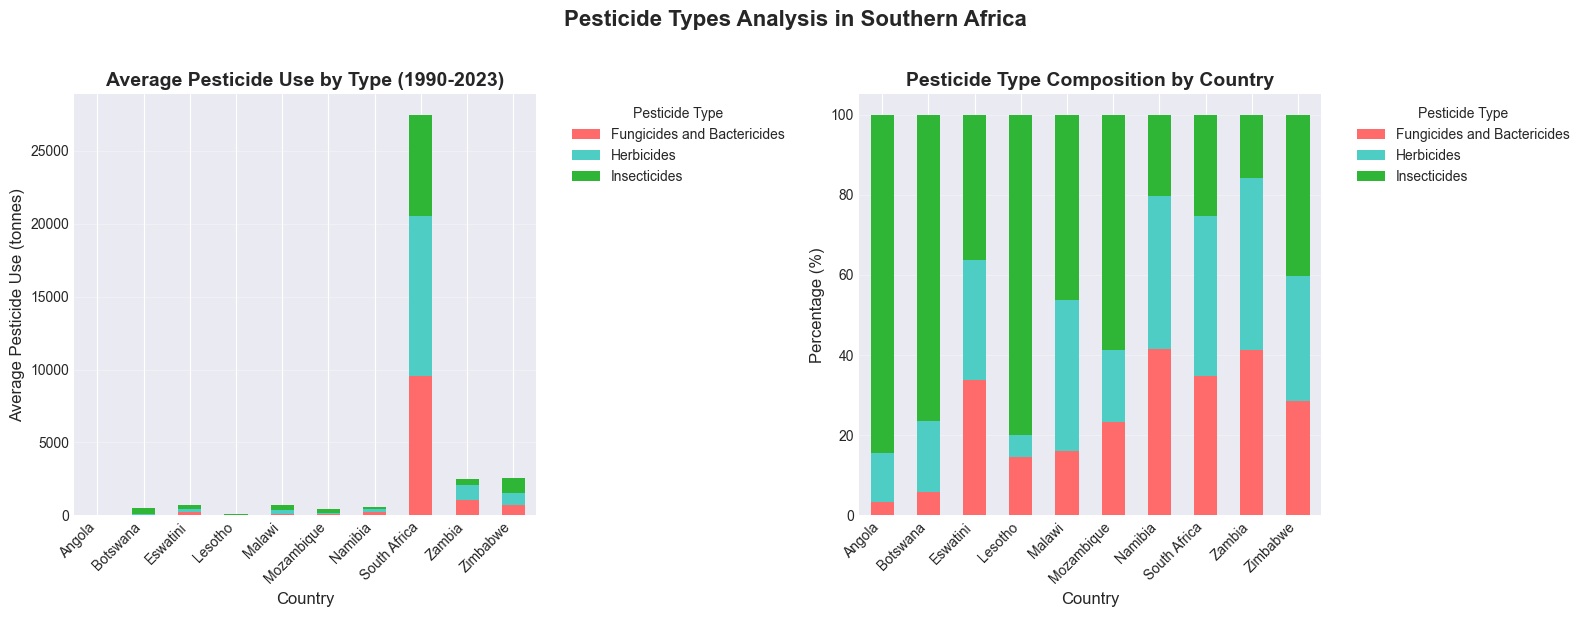


PESTICIDE TYPES BREAKDOWN:
Total use by type (tonnes):
  • Fungicides and Bactericides: 408,538 tonnes (33.7%)
  • Herbicides: 467,889 tonnes (38.6%)
  • Insecticides: 334,342 tonnes (27.6%)


In [14]:
# Analyze pesticide types distribution
# Removed 'Pesticides (total)' to avoid double counting
pesticide_types = pesticide_uses[pesticide_uses['Pesticide_Type'] != 'Pesticides (total)'].copy()

# Calculate average use by type and country
type_summary = pesticide_types.groupby(['Country', 'Pesticide_Type'])['Tonnes'].mean().reset_index()
type_pivot = type_summary.pivot(index='Country', columns='Pesticide_Type', values='Tonnes').fillna(0)

# Create stacked bar chart
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(16, 6))

# Stacked bar chart
type_pivot.plot(kind='bar', stacked=True, ax=ax1,
                color=['#FF6B6B', '#4ECDC4', '#2FB636'])
ax1.set_xlabel('Country')
ax1.set_ylabel('Average Pesticide Use (tonnes)')
ax1.set_title('Average Pesticide Use by Type (1990-2023)', fontweight='bold')
ax1.legend(title='Pesticide Type', bbox_to_anchor=(1.05, 1), loc='upper left')
ax1.grid(axis='y', alpha=0.3)
plt.setp(ax1.xaxis.get_majorticklabels(), rotation=45, ha='right')

# Percentage composition
type_pivot_pct = type_pivot.div(type_pivot.sum(axis=1), axis=0) * 100
type_pivot_pct.plot(kind='bar', stacked=True, ax=ax2,
                    color=['#FF6B6B', '#4ECDC4', "#2FB636"])
ax2.set_xlabel('Country')
ax2.set_ylabel('Percentage (%)')
ax2.set_title('Pesticide Type Composition by Country', fontweight='bold')
ax2.legend(title='Pesticide Type', bbox_to_anchor=(1.05, 1), loc='upper left')
ax2.grid(axis='y', alpha=0.3)
plt.setp(ax2.xaxis.get_majorticklabels(), rotation=45, ha='right')

plt.suptitle('Pesticide Types Analysis in Southern Africa',
             fontsize=16, fontweight='bold', y=1.02)
plt.tight_layout()
plt.show()

# Print summary statistics
print("\nPESTICIDE TYPES BREAKDOWN:")
total_by_type = pesticide_types.groupby('Pesticide_Type')['Tonnes'].sum()
print(f"Total use by type (tonnes):")
for ptype, value in total_by_type.items():
    pct = (value / total_by_type.sum()) * 100
    print(f"  • {ptype}: {value:,.0f} tonnes ({pct:.1f}%)")

South Africa grouped pesticide usage (1990–2023):


,Pesticide_Type,Tonnes
0,Herbicides,374056.0
1,Fungicides and Bactericides,324056.0
2,Insecticides,236226.0


All countries grouped pesticide usage (1990–2023):


,Pesticide_Type,Tonnes
0,Herbicides,467889.0
1,Fungicides and Bactericides,408538.0
2,Insecticides,334342.0


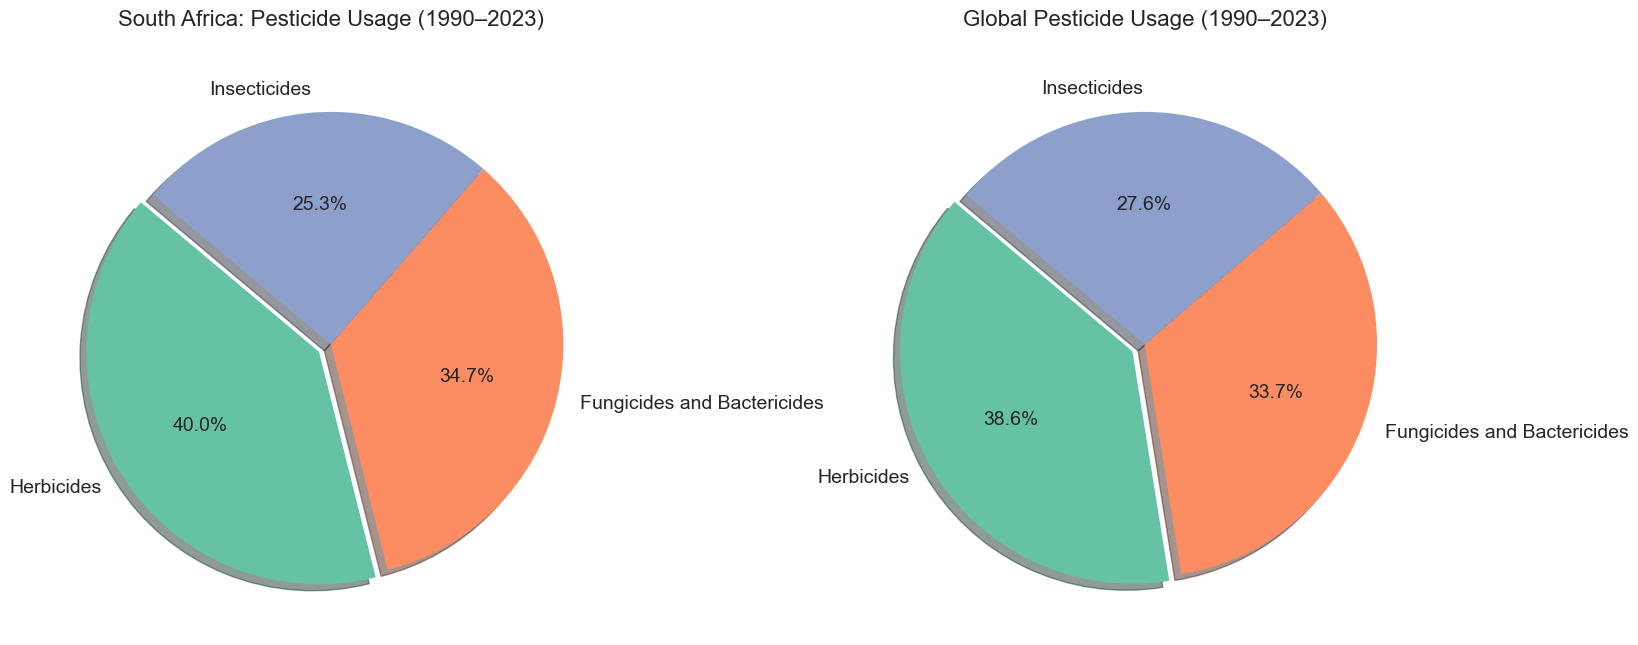

In [15]:
# Excluded "Pesticides (total)"
df_filtered = merged_df[merged_df["Pesticide_Type"] != "Pesticides (total)"]

# South Africa Data
sa_df = df_filtered[df_filtered["Country"] == "South Africa"]
sa_grouped = sa_df.groupby("Pesticide_Type")["Tonnes"].sum().reset_index()
sa_grouped = sa_grouped.sort_values(by="Tonnes", ascending=False).reset_index(drop=True)

print("South Africa grouped pesticide usage (1990–2023):")
display(sa_grouped)

# Global Data
grouped_all = df_filtered.groupby("Pesticide_Type")["Tonnes"].sum().reset_index()
grouped_all = grouped_all.sort_values(by="Tonnes", ascending=False).reset_index(drop=True)

print("All countries grouped pesticide usage (1990–2023):")
display(grouped_all)

# Side-by-side Pie Charts
fig, axes = plt.subplots(1, 2, figsize=(18, 9))  # slightly wider figure

# Explode arrays
explode_sa = [0.06] + [0]*(len(sa_grouped)-1)
explode_all = [0.06] + [0]*(len(grouped_all)-1)

# South Africa pie chart
axes[0].pie(
    sa_grouped["Tonnes"],
    labels=sa_grouped["Pesticide_Type"],
    autopct='%1.1f%%',
    startangle=140,
    colors=plt.cm.Set2.colors,
    explode=explode_sa,
    shadow=True,
    textprops={'fontsize': 14}
)
axes[0].set_title("South Africa: Pesticide Usage (1990–2023)", fontsize=16, pad=20)

# Global pie chart
axes[1].pie(
    grouped_all["Tonnes"],
    labels=grouped_all["Pesticide_Type"],
    autopct='%1.1f%%',
    startangle=140,
    colors=plt.cm.Set2.colors,
    explode=explode_all,
    shadow=True,
    textprops={'fontsize': 14}
)
axes[1].set_title("Global Pesticide Usage (1990–2023)", fontsize=16, pad=20)

# Adjust layout for better separation
plt.subplots_adjust(wspace=0.4)  # increase horizontal space between charts

plt.show()



## South Africa Regional Leadership Analysis

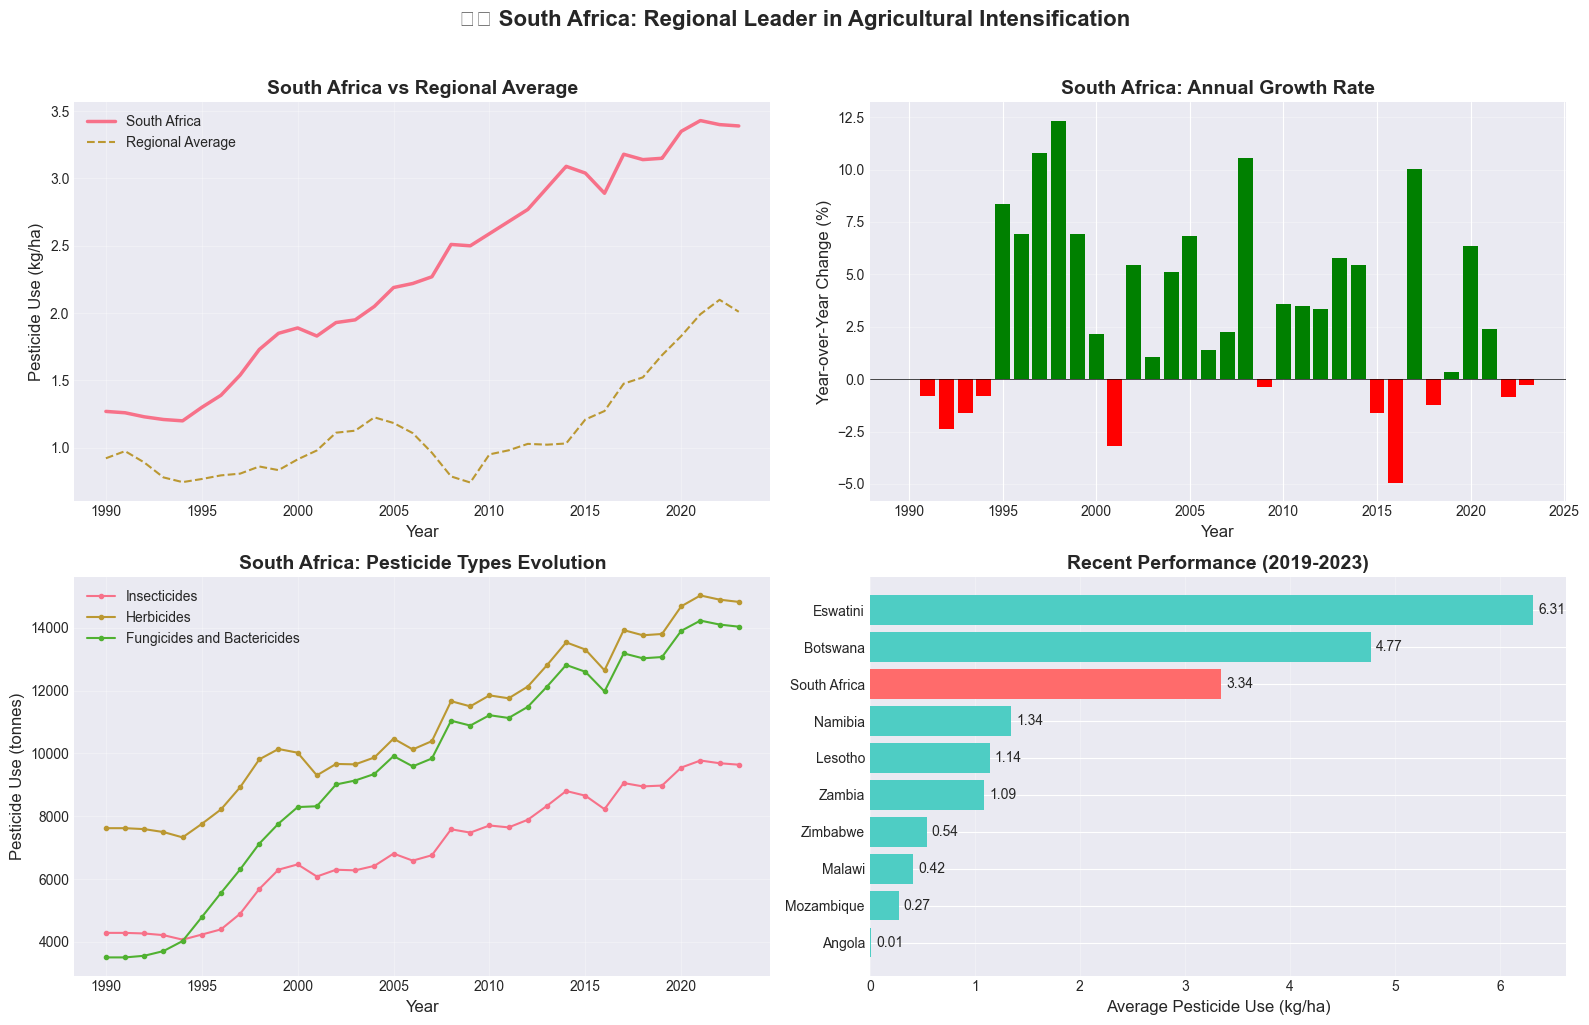


🇿🇦 SOUTH AFRICA KEY METRICS:
• Current use (2023): 3.39 kg/ha
• Average annual growth: 0.76%
• Peak year: 2021
• Peak value: 3.43 kg/ha


In [16]:
# Focus on South Africa as the regional leader
sa_data = pesticide_uses[pesticide_uses['Country'] == 'South Africa'].copy()
regional_avg = pesticide_uses.groupby('Year')['Kg_per_ha'].mean().reset_index()
regional_avg['Country'] = 'Regional Average'

# Combine for comparison
comparison_data = pd.concat([sa_data, regional_avg], ignore_index=True)

# Create comparison visualization
fig, axes = plt.subplots(2, 2, figsize=(16, 10))

# 1. South Africa vs Regional Average
ax1 = axes[0, 0]
for country in comparison_data['Country'].unique():
    data = comparison_data[comparison_data['Country'] == country]
    style = '-' if country == 'South Africa' else '--'
    width = 2.5 if country == 'South Africa' else 1.5
    ax1.plot(data['Year'], data['Kg_per_ha'],
             label=country, linestyle=style, linewidth=width)

ax1.set_xlabel('Year')
ax1.set_ylabel('Pesticide Use (kg/ha)')
ax1.set_title('South Africa vs Regional Average', fontweight='bold')
ax1.legend()
ax1.grid(alpha=0.3)

# 2. Year-over-year change for South Africa
ax2 = axes[0, 1]
sa_data_sorted = sa_data.sort_values('Year')
sa_data_sorted['YoY_Change'] = sa_data_sorted['Kg_per_ha'].pct_change() * 100
ax2.bar(sa_data_sorted['Year'].iloc[1:], sa_data_sorted['YoY_Change'].iloc[1:],
        color=['green' if x > 0 else 'red' for x in sa_data_sorted['YoY_Change'].iloc[1:]])
ax2.set_xlabel('Year')
ax2.set_ylabel('Year-over-Year Change (%)')
ax2.set_title('South Africa: Annual Growth Rate', fontweight='bold')
ax2.axhline(y=0, color='black', linestyle='-', linewidth=0.5)
ax2.grid(axis='y', alpha=0.3)

# 3. South Africa's pesticide types over time
ax3 = axes[1, 0]
sa_types = merged_df[
    (merged_df['Country'] == 'South Africa') &
    (merged_df['Pesticide_Type'] != 'Pesticides (total)')
]
for ptype in sa_types['Pesticide_Type'].unique():
    type_data = sa_types[sa_types['Pesticide_Type'] == ptype]
    ax3.plot(type_data['Year'], type_data['Tonnes'],
             label=ptype, marker='o', markersize=3)

ax3.set_xlabel('Year')
ax3.set_ylabel('Pesticide Use (tonnes)')
ax3.set_title('South Africa: Pesticide Types Evolution', fontweight='bold')
ax3.legend()
ax3.grid(alpha=0.3)

# 4. Comparison with neighboring countries (latest 5 years)
ax4 = axes[1, 1]
recent_years = merged_df[merged_df['Year'] >= 2019]
recent_avg = recent_years.groupby('Country')['Kg_per_ha'].mean().sort_values()
colors_bar = ['#FF6B6B' if c == 'South Africa' else '#4ECDC4' for c in recent_avg.index]
bars = ax4.barh(recent_avg.index, recent_avg.values, color=colors_bar)
ax4.set_xlabel('Average Pesticide Use (kg/ha)')
ax4.set_title('Recent Performance (2019-2023)', fontweight='bold')
ax4.grid(axis='x', alpha=0.3)

for i, (country, value) in enumerate(recent_avg.items()):
    ax4.text(value + 0.05, i, f'{value:.2f}', va='center')

plt.suptitle('🇿🇦 South Africa: Regional Leader in Agricultural Intensification',
             fontsize=16, fontweight='bold', y=1.02)
plt.tight_layout()
plt.show()

# Key statistics for South Africa
print("\n🇿🇦 SOUTH AFRICA KEY METRICS:")
sa_2023 = sa_data[sa_data['Year'] == 2023]['Kg_per_ha'].values
print(f"• Current use (2023): {sa_2023[0] if len(sa_2023) > 0 else 'N/A':.2f} kg/ha")
print(f"• Average annual growth: {sa_data_sorted['YoY_Change'].mean():.2f}%")
print(f"• Peak year: {sa_data.loc[sa_data['Kg_per_ha'].idxmax(), 'Year']:.0f}")
print(f"• Peak value: {sa_data['Kg_per_ha'].max():.2f} kg/ha")

## 8. Database Integration

In [ ]:
# Make pandas display readable numbers
pd.set_option("display.float_format", "{:,.2f}".format)

try:
    # Connect to DB with default isolation_level (transaction managed by conn.commit())
    conn = sqlite3.connect("Pesticide_Uses_ZA.db")
    cursor = conn.cursor()

    # Load dataset
    df = pd.read_sql_query("SELECT * FROM Pesticide_Uses;", conn)

    # Start transaction
    # All changes will be part of this transaction until conn.commit() or conn.rollback()
    print("Transaction started.")

    # Delete 'Pesticides (total)' rows
    cursor.execute("""
        DELETE FROM Pesticide_Uses
        WHERE Pesticide_Type = 'Pesticides (total)';
    """)
    df = df[df['Pesticide_Type'] != 'Pesticides (total)'].copy()

    # Correlation analysis (Tonnes vs Kg_per_ha)
    corr_value = df["Tonnes"].corr(df["Kg_per_ha"])
    print(f"Correlation between Tonnes and Kg_per_ha: {corr_value:.3f}")

    # Outlier detection (IQR)
    Q1 = df["Kg_per_ha"].quantile(0.25)
    Q3 = df["Kg_per_ha"].quantile(0.75)
    IQR = Q3 - Q1
    outliers = df[
        (df["Kg_per_ha"] < (Q1 - 1.5 * IQR)) |
        (df["Kg_per_ha"] > (Q3 + 1.5 * IQR))
    ]
    print(f"Found {len(outliers)} potential outliers in Kg_per_ha relative to Tonnes.")

    # Save analytics results back to DB
    pd.DataFrame(
        {"Metric": ["Tonnes_vs_Kg_per_ha_Correlation"], "Value": [corr_value]}
    ).to_sql("Analytics_Summary", conn, if_exists="replace", index=False)

    outliers.to_sql("Outliers_Detected", conn, if_exists="replace", index=False)

    # Commit transaction
    conn.commit()
    print("Transaction committed successfully. All changes applied.")

    display(df.head())
    print("\nOutliers detected:")
    display(outliers.head())

except Exception as e:
    # Rollback transaction if any error occurs
    conn.rollback()
    print("Error occurred. Transaction rolled back.")
    print(str(e))

finally:
    cursor.close()
    conn.close()



Transaction started.
Correlation between Tonnes and Kg_per_ha: 0.324
Found 78 potential outliers in Kg_per_ha relative to Tonnes.
Transaction committed successfully. All changes applied.


,Country,Indicator_x,Unit_Measure(T),Pesticide_Type,Year,Tonnes,Indicator_y,Unit_Measure(kg/ha),Kg_per_ha
0,Angola,Pesticides Agricultural Use,Tonnes,Insecticides,1990,56.00,Pesticides Use per area of cropland,Kilogram per hectare,0.02
1,Angola,Pesticides Agricultural Use,Tonnes,Herbicides,1990,0.00,Pesticides Use per area of cropland,Kilogram per hectare,0.02
2,Angola,Pesticides Agricultural Use,Tonnes,Fungicides and Bactericides,1990,5.00,Pesticides Use per area of cropland,Kilogram per hectare,0.02
4,Botswana,Pesticides Agricultural Use,Tonnes,Insecticides,1990,272.00,Pesticides Use per area of cropland,Kilogram per hectare,0.83
5,Botswana,Pesticides Agricultural Use,Tonnes,Herbicides,1990,52.00,Pesticides Use per area of cropland,Kilogram per hectare,0.83



Outliers detected:


,Country,Indicator_x,Unit_Measure(T),Pesticide_Type,Year,Tonnes,Indicator_y,Unit_Measure(kg/ha),Kg_per_ha
24,Eswatini,Pesticides Agricultural Use,Tonnes,Insecticides,1990,268.00,Pesticides Use per area of cropland,Kilogram per hectare,3.86
25,Eswatini,Pesticides Agricultural Use,Tonnes,Herbicides,1990,162.00,Pesticides Use per area of cropland,Kilogram per hectare,3.86
26,Eswatini,Pesticides Agricultural Use,Tonnes,Fungicides and Bactericides,1990,214.00,Pesticides Use per area of cropland,Kilogram per hectare,3.86
64,Eswatini,Pesticides Agricultural Use,Tonnes,Insecticides,1991,272.00,Pesticides Use per area of cropland,Kilogram per hectare,3.80
65,Eswatini,Pesticides Agricultural Use,Tonnes,Herbicides,1991,164.00,Pesticides Use per area of cropland,Kilogram per hectare,3.80


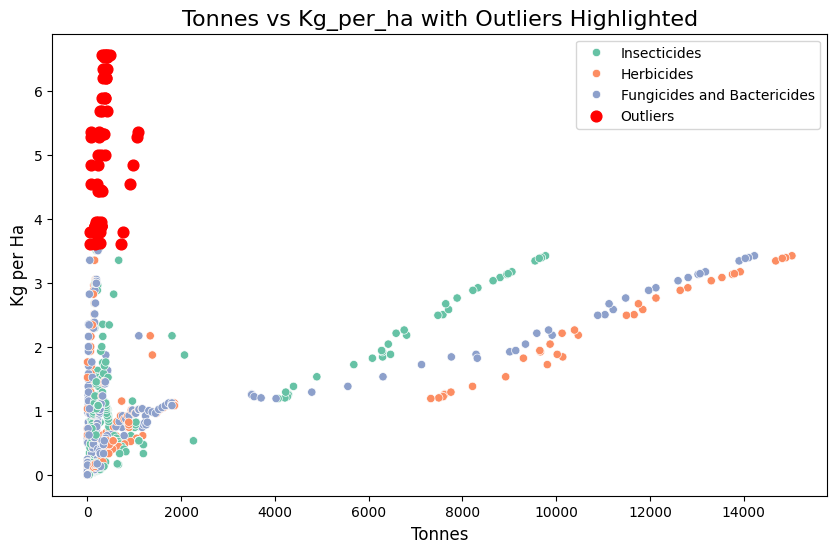

In [6]:
# Load outliers from DB
conn = sqlite3.connect("Pesticide_Uses_ZA.db")
outliers = pd.read_sql_query("SELECT * FROM Outliers_Detected;", conn)
conn.close()

plt.figure(figsize=(10,6))
sns.scatterplot(x='Tonnes', y='Kg_per_ha', hue='Pesticide_Type', data=df, palette="Set2")
plt.scatter(outliers['Tonnes'], outliers['Kg_per_ha'], color='red', label='Outliers', s=60)
plt.title("Tonnes vs Kg_per_ha with Outliers Highlighted", fontsize=16)
plt.xlabel("Tonnes", fontsize=12)
plt.ylabel("Kg per Ha", fontsize=12)
plt.legend()
plt.show()


,Decade,Avg_Kg_per_ha
0,1990s,0.84
1,2000s,1.01
2,2010s,1.22
3,2020s,1.98


Average use per hectare increased by 136.63% from 1990s to 2020s.


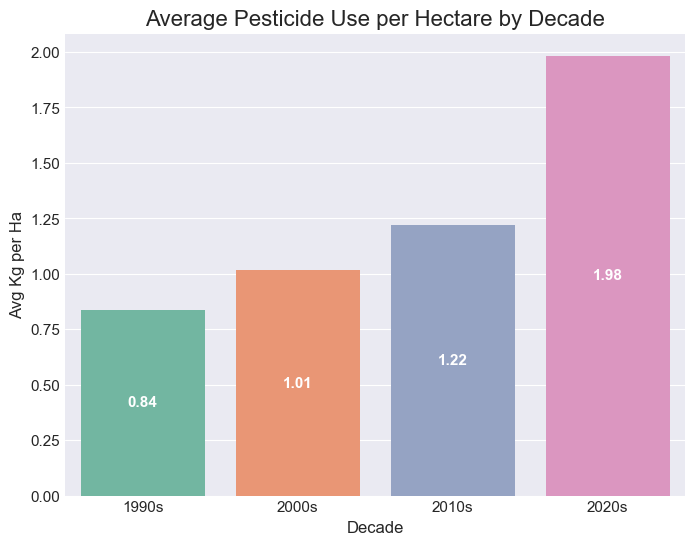

In [20]:
# Load data from DB
conn = sqlite3.connect("Pesticide_Uses_ZA.db")
df = pd.read_sql_query("SELECT * FROM Pesticide_Uses;", conn)
conn.close()

# Create decade labels
def get_decade(year):
    if 1990 <= year <= 1999:
        return "1990s"
    elif 2000 <= year <= 2009:
        return "2000s"
    elif 2010 <= year <= 2019:
        return "2010s"
    elif 2020 <= year <= 2023:
        return "2020s"
    else:
        return "Other"

df["Decade"] = df["Year"].apply(get_decade)

# Average Kg_per_ha per decade
avg_decade = (
    df.groupby("Decade", as_index=False)["Kg_per_ha"]
    .mean()
    .rename(columns={"Kg_per_ha": "Avg_Kg_per_ha"})
)

display(avg_decade)

# Calculated percentage increase from 1990s to 2020s
first_decade = avg_decade.loc[avg_decade["Decade"] == "1990s", "Avg_Kg_per_ha"].values[0]
last_decade = avg_decade.loc[avg_decade["Decade"] == "2020s", "Avg_Kg_per_ha"].values[0]

pct_increase = ((last_decade - first_decade) / first_decade) * 100
print(f"Average use per hectare increased by {pct_increase:.2f}% from 1990s to 2020s.")

# Visualization: Bar chart
plt.figure(figsize=(8,6))
barplot = sns.barplot(x="Decade", y="Avg_Kg_per_ha", data=avg_decade, palette="Set2")

# Add value annotations inside each bar
for index, row in avg_decade.iterrows():
    barplot.text(
        index,
        row.Avg_Kg_per_ha / 2,
        f"{row.Avg_Kg_per_ha:.2f}",
        color='white',
        ha="center",
        va="center",
        fontsize=11,
        fontweight='bold'
    )

# Titles and labels
plt.title("Average Pesticide Use per Hectare by Decade", fontsize=16)
plt.ylabel("Avg Kg per Ha", fontsize=12)
plt.xlabel("Decade", fontsize=12)
plt.xticks(fontsize=11)
plt.yticks(fontsize=11)

plt.show()
